# ARIMA aplicado na serie temporal 03
## Cotacao do Fundo de Investimento de Acoes

In [24]:
import pandas as pd
import numpy as np
import warnings

from statsmodels.tsa.arima_model import ARIMA

# imports de modulos que estao definidos dentro do projeto
import data
import timeseries
import arima
import constants

import matplotlib.pyplot as plt
%matplotlib inline

## Transformacao da serie temporal 'MENSAL com duas amostras'

In [25]:
ts = data.load_timeseries03_monthly2()
ts.columns = ['rate']
#arima.print_dataframe_info(ts)
#timeseries.plot_timeserie(ts)

In [26]:
ts_transform = timeseries.ts_transform1(ts)

#timeseries.plot_timeserie(ts_transform['ts_log']) # primeira transformacao
#timeseries.plot_timeserie(ts_transform['ts_log_diff']) # segunda transformacao

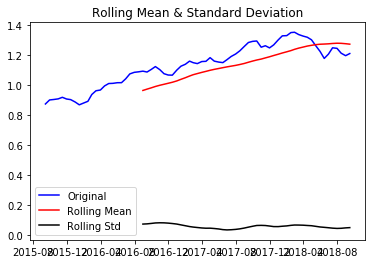

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.629370) > Critical Value 1 (-3.527426)
[FALHA] Test Statistic (-1.629370) > Critical Value 5 (-2.903811)
[FALHA] Test Statistic (-1.629370) > Critical Value 10 (-2.589320)
[FALHA] p-value (0.467820) > 0.05


In [27]:
timeseries.check_stationarity(ts_transform['ts_log'], window=24)

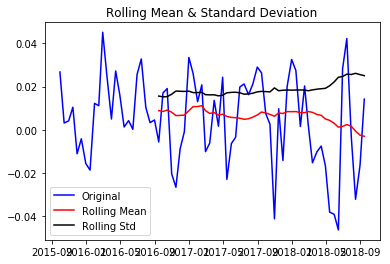

Results of Dickey-Fuller Test:
[SUCESSO] Test Statistic (-5.467554) < Critical Value 1 (-3.526005)
[SUCESSO] Test Statistic (-5.467554) < Critical Value 5 (-2.903200)
[SUCESSO] Test Statistic (-5.467554) < Critical Value 10 (-2.588995)
[SUCESSO] p-value (0.000002) < 0.05


In [28]:
timeseries.check_stationarity(ts_transform['ts_log_diff'], window=24)

## ARIMA aplicado na serie temporal 'MENSAL com duas amostras'

Parameter 'dataset' length:  73
Dataset 'train' length:  58
Dataset 'test' length:  15


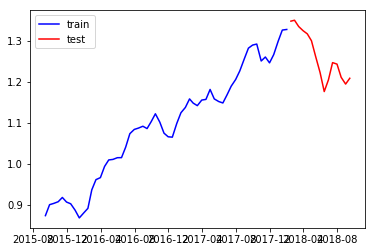

In [29]:
train, test = arima.split_dataset(ts_transform['ts_log'], porcentagem=constants.PORCENTAGEM, debug=True)

timeseries.plot_train_and_test(train, test)

MSE: 0.000273291


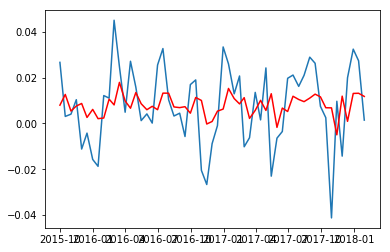

In [30]:
# depois do Grid Search
#Melhores parametros: ARIMA(1, 0, 1)
arima_params = (0, 1, 1)

model = ARIMA(train, order=arima_params)
results_ARIMA = model.fit(disp=-1)

#arima.print_dataframe_info(results_ARIMA.fittedvalues)

train_size = int(len(ts_transform['ts_log_diff']) * constants.PORCENTAGEM)
ts_train = ts_transform['ts_log_diff'][0:train_size]

#arima.print_dataframe_info(ts_train)

timeseries.plot_train_and_arima(ts_train, results_ARIMA)

MSE: 0.014801000


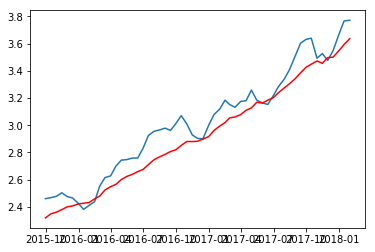

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(train.iloc[0], index=train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA.apply(lambda x: x*2.3)
predictions_ARIMA = predictions_ARIMA[1:]

#arima.print_dataframe_info(predictions_ARIMA)

train_size = int(len(ts) * constants.PORCENTAGEM)
ts_train = ts[1:train_size]

#arima.print_dataframe_info(ts_train)

timeseries.plot_train_and_predictions(ts_train, predictions_ARIMA)

MSE: 0.051826287


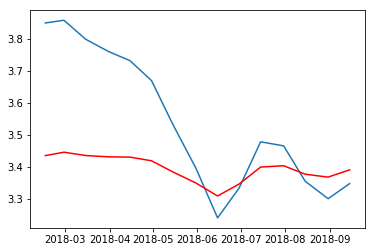

In [32]:
historical, predictions = arima.forecast(train, test, arima_params)

for i in range(len(predictions)):
    predictions[i] = np.log(predictions[i]) + historical[i]/3.2 + 0.9

arima.plot_historical_and_predictions(historical, predictions, test)

## Transformacao da serie temporal 'MENSAL'

In [33]:
ts = data.load_timeseries03_monthly()
ts.columns = ['rate']
#arima.print_dataframe_info(ts)
#timeseries.plot_timeserie(ts)

In [34]:
ts_transform = timeseries.ts_transform1(ts)

#timeseries.plot_timeserie(ts_transform['ts_log']) # primeira transformacao
#timeseries.plot_timeserie(ts_transform['ts_log_diff']) # segunda transformacao

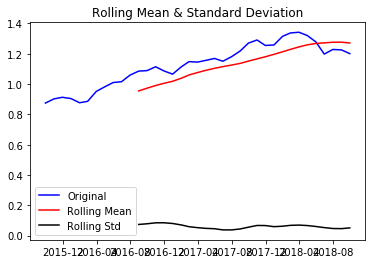

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.787517) > Critical Value 1 (-3.626652)
[FALHA] Test Statistic (-1.787517) > Critical Value 5 (-2.945951)
[FALHA] Test Statistic (-1.787517) > Critical Value 10 (-2.611671)
[FALHA] p-value (0.386676) > 0.05


In [35]:
timeseries.check_stationarity(ts_transform['ts_log'], window=12)

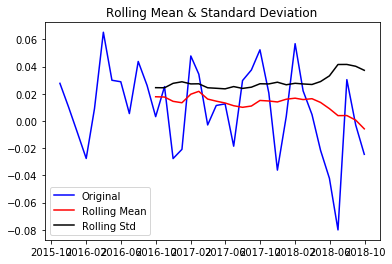

Results of Dickey-Fuller Test:
[SUCESSO] Test Statistic (-4.335586) < Critical Value 1 (-3.632743)
[SUCESSO] Test Statistic (-4.335586) < Critical Value 5 (-2.948510)
[SUCESSO] Test Statistic (-4.335586) < Critical Value 10 (-2.613017)
[SUCESSO] p-value (0.000385) < 0.05


In [36]:
timeseries.check_stationarity(ts_transform['ts_log_diff'], window=12)

## ARIMA aplicado na serie temporal 'MENSAL'

Parameter 'dataset' length:  37
Dataset 'train' length:  29
Dataset 'test' length:  8


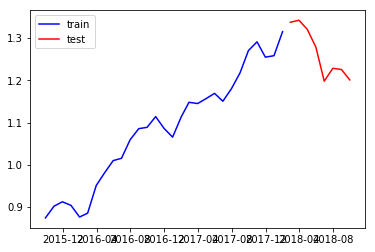

In [37]:
train, test = arima.split_dataset(ts_transform['ts_log'], porcentagem=constants.PORCENTAGEM, debug=True)

timeseries.plot_train_and_test(train, test)

MSE: 0.000621679


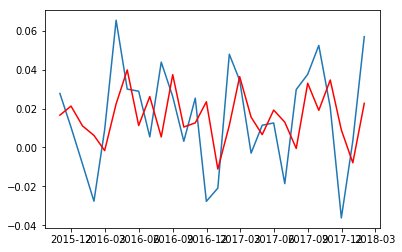

In [38]:
# depois do Grid Search
#Melhores parametros: ARIMA(1, 0, 0)
arima_params = (0, 1, 1)

model = ARIMA(train, order=arima_params)
results_ARIMA = model.fit(disp=-1)

#arima.print_dataframe_info(results_ARIMA.fittedvalues)

train_size = int(len(ts_transform['ts_log_diff']) * constants.PORCENTAGEM)
ts_train = ts_transform['ts_log_diff'][0:train_size]

#arima.print_dataframe_info(ts_train)

timeseries.plot_train_and_arima(ts_train, results_ARIMA)

MSE: 0.010853548


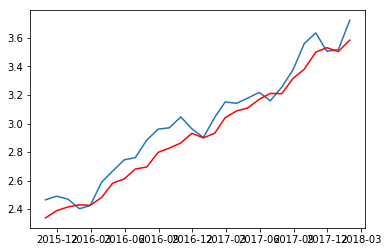

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(train.iloc[0], index=train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA.apply(lambda x: x*2.3)
predictions_ARIMA = predictions_ARIMA[1:]

#arima.print_dataframe_info(predictions_ARIMA)

train_size = int(len(ts) * constants.PORCENTAGEM)
ts_train = ts[1:train_size]

#arima.print_dataframe_info(ts_train)

timeseries.plot_train_and_predictions(ts_train, predictions_ARIMA)

MSE: 0.048550232


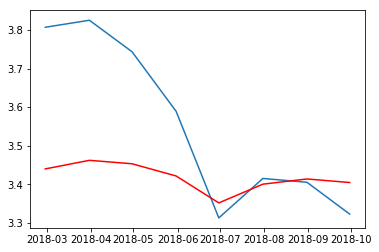

In [40]:
historical, predictions = arima.forecast(train, test, arima_params)

for i in range(len(predictions)):
    predictions[i] = np.log(predictions[i]) + historical[i]/3.2 + 0.9
    
arima.plot_historical_and_predictions(historical, predictions, test)